In [1]:
# Imports essenciais no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suprimindo FutureWarnings
warnings.simplefilter(action='ignore', category = FutureWarning)

# Importação e Exploração Inicial dos Dados

Importação do dataset e a primeira exploração para entender suas dimensões e tipos de dados. Isso inclui a exibição das primeiras linhas, contagem dos tipos de dados, estatísticas descritivas das colunas, e verificação do número de linhas e colunas do conjunto de dados.


In [2]:
# Importando os datasets à serem utilizados
df = pd.read_csv("BankChurners.csv")

In [3]:
# Mostrando as 5 primeiras linhas do dataset
df.head(5)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
# Contagem dos tipos de dados no dataset
df.dtypes.value_counts()

int64      10
float64     7
object      6
Name: count, dtype: int64

In [5]:
# Contagem de valores únicos, nas colunas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")

Attrition_Flag: 2 valores únicos
Gender: 2 valores únicos
Education_Level: 7 valores únicos
Marital_Status: 4 valores únicos
Income_Category: 6 valores únicos
Card_Category: 4 valores únicos


In [6]:
# Estatísticas descritivas para colunas numéricas do dataset
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [7]:
# Exibindo o formato do dataset
tupla_shape = df.shape
print(f"Linhas: {tupla_shape[0]} || Colunas: {tupla_shape[1]}")

Linhas: 10127 || Colunas: 23


# Visualização e Análise de Dados (EDA)

A seção a seguir contém diversos passos de visualização e análise para explorar o conjunto de dados utilizando diferentes tipos de gráficos, como histogramas, gráficos de barras, gráficos de pizza e box plots. Cada uma dessas visualizações tem o objetivo de obter insights sobre os dados dos clientes, incluindo status de churn, informações demográficas e comportamentos dos clientes.



In [8]:
# Função criada para tornar os nomes das colunas mais legíveis e casuais, visando melhorar a compreensão
def tranformador_titulo(titulo : str) -> str:
    index = df.columns.get_loc(titulo)
    lista_titulos = ["Customer ID", "Churn Status", "Age", "Gender", "Dependents", "Education",
                     "Marital Status", "Income Level", "Card Type", "Months As Customer", "Total Products",
                     "Inactive Months Last Year", "Contacts Last Year", "Credit Limit", "Total Revolving Balance",
                     "Average Open To Buy", "Total Amount Change Q4 to Q1", "Total Transactions Amount",
                     "Total Transactions Count", "Total Count Change Q4 to Q1", "Average Utilization Ratio"]
    return lista_titulos[index]

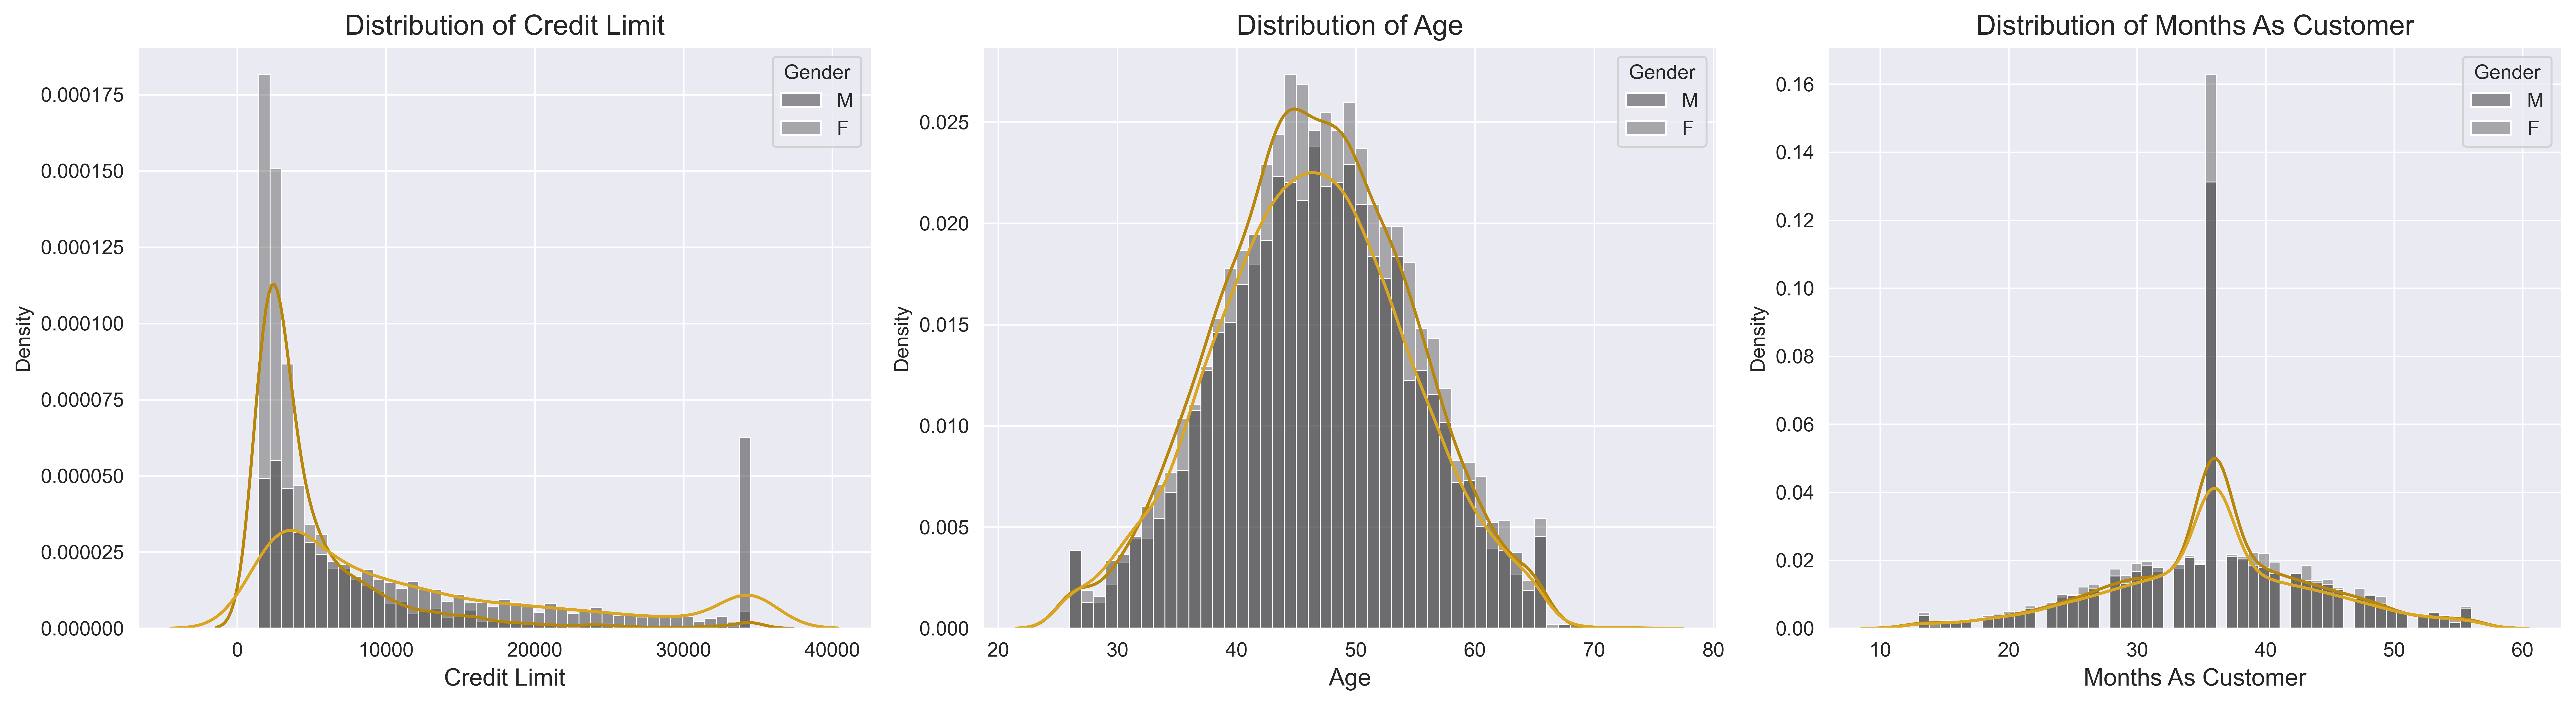

In [9]:
# Lista de colunas para plotar a distribuição
distribution_list = ["Credit_Limit", "Customer_Age", "Months_on_book"]

fig, axs = plt.subplots(1, 3, figsize=(18, 5), dpi=600)
axs = axs.flatten()

# Paleta de cinza mais escura personalizada para as barras
paleta_customizada = ['#333333', '#666666']

for idx, col in enumerate(distribution_list):
    # Histograma seguido de um KDEplot criando uma composição interessante
    sns.kdeplot(data=df, x=col, hue="Gender", ax=axs[idx], palette=['goldenrod', '#B8860B'])
    sns.histplot(data=df, x=col, hue="Gender", palette=paleta_customizada, kde=False, stat='density', ax=axs[idx])
    
    axs[idx].set_title(f'Distribution of {tranformador_titulo(col)}', fontsize=14)
    axs[idx].set_xlabel(tranformador_titulo(col), fontsize=12)
    axs[idx].set_ylabel('Density')

plt.tight_layout()
plt.show()

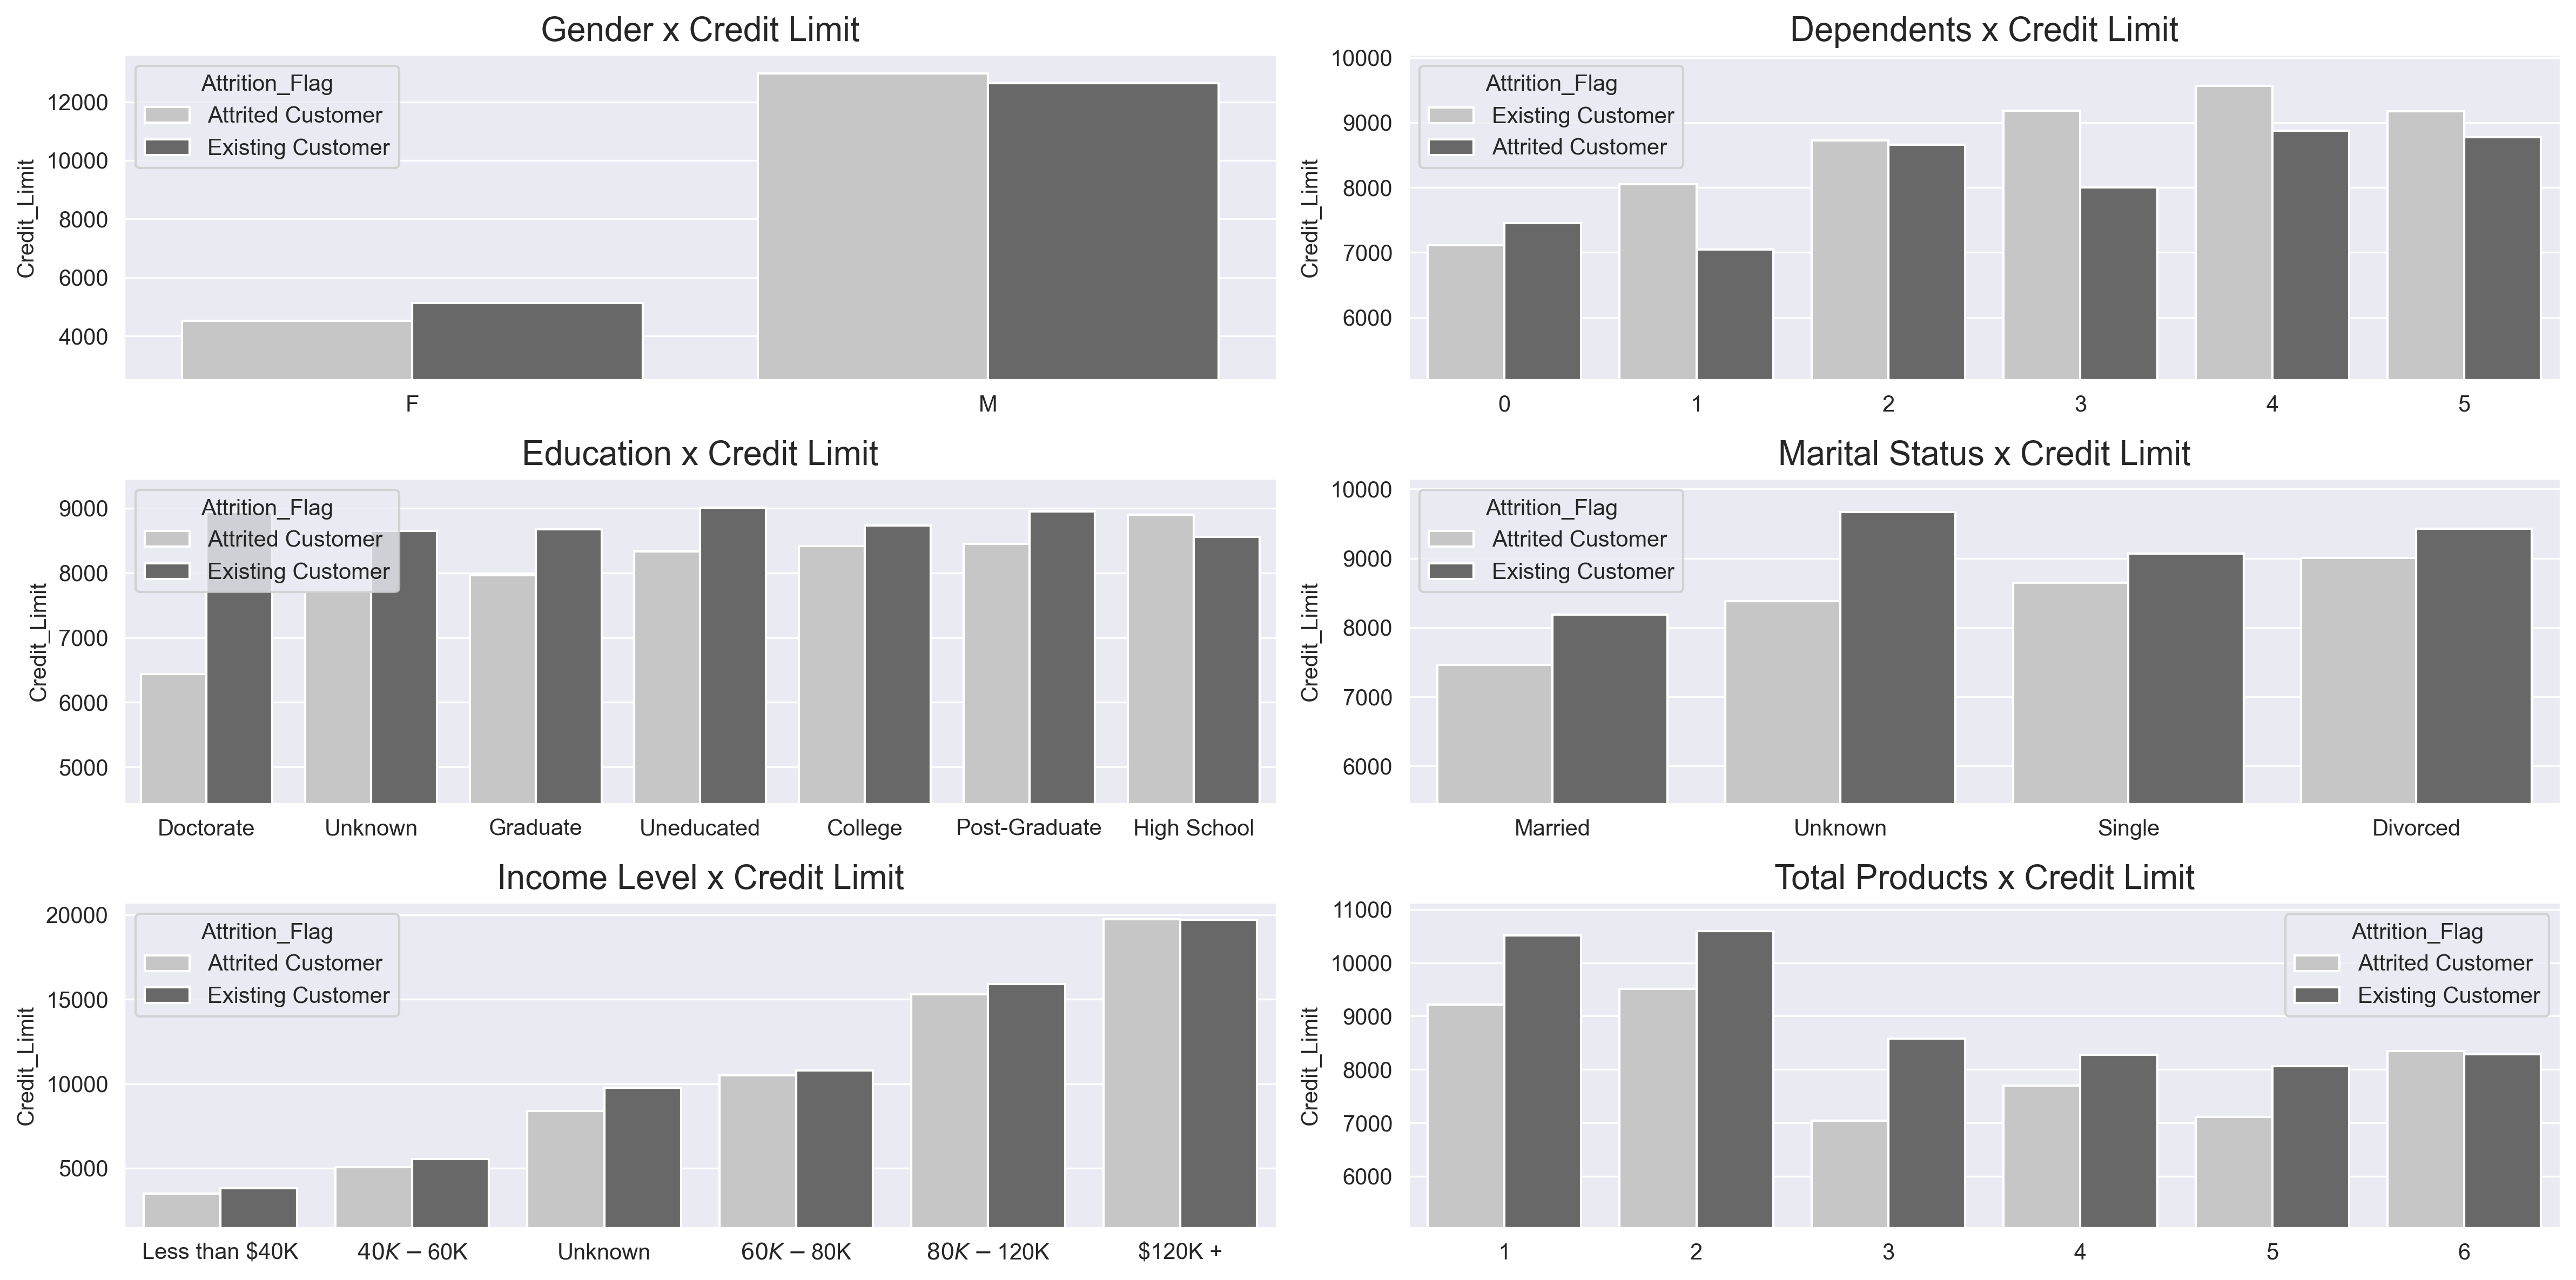

In [10]:
# Colunas de interesse para o gráfico de barras
bar_credito = ['Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Total_Relationship_Count']

fig, axs = plt.subplots(3, 2, figsize=(16, 8), dpi=300)
axs = axs.flatten()

for idx, col in enumerate(bar_credito):
    groupby_col = df.groupby([col, 'Attrition_Flag'])["Credit_Limit"].mean().reset_index()
    sns.barplot(data=groupby_col.sort_values(by = "Credit_Limit"), x=col, y="Credit_Limit", hue='Attrition_Flag', palette="Greys", ax=axs[idx])
    
    placeholder = groupby_col["Credit_Limit"]
        
    # Definindo um limite mínimo de visibilidade no gráfico
    axs[idx].set_ylim(placeholder.min() - 2000)
    axs[idx].set_xlabel("")
    axs[idx].set_title(f"{tranformador_titulo(col)} x Credit Limit", fontsize=15)
    
plt.tight_layout()
plt.show()

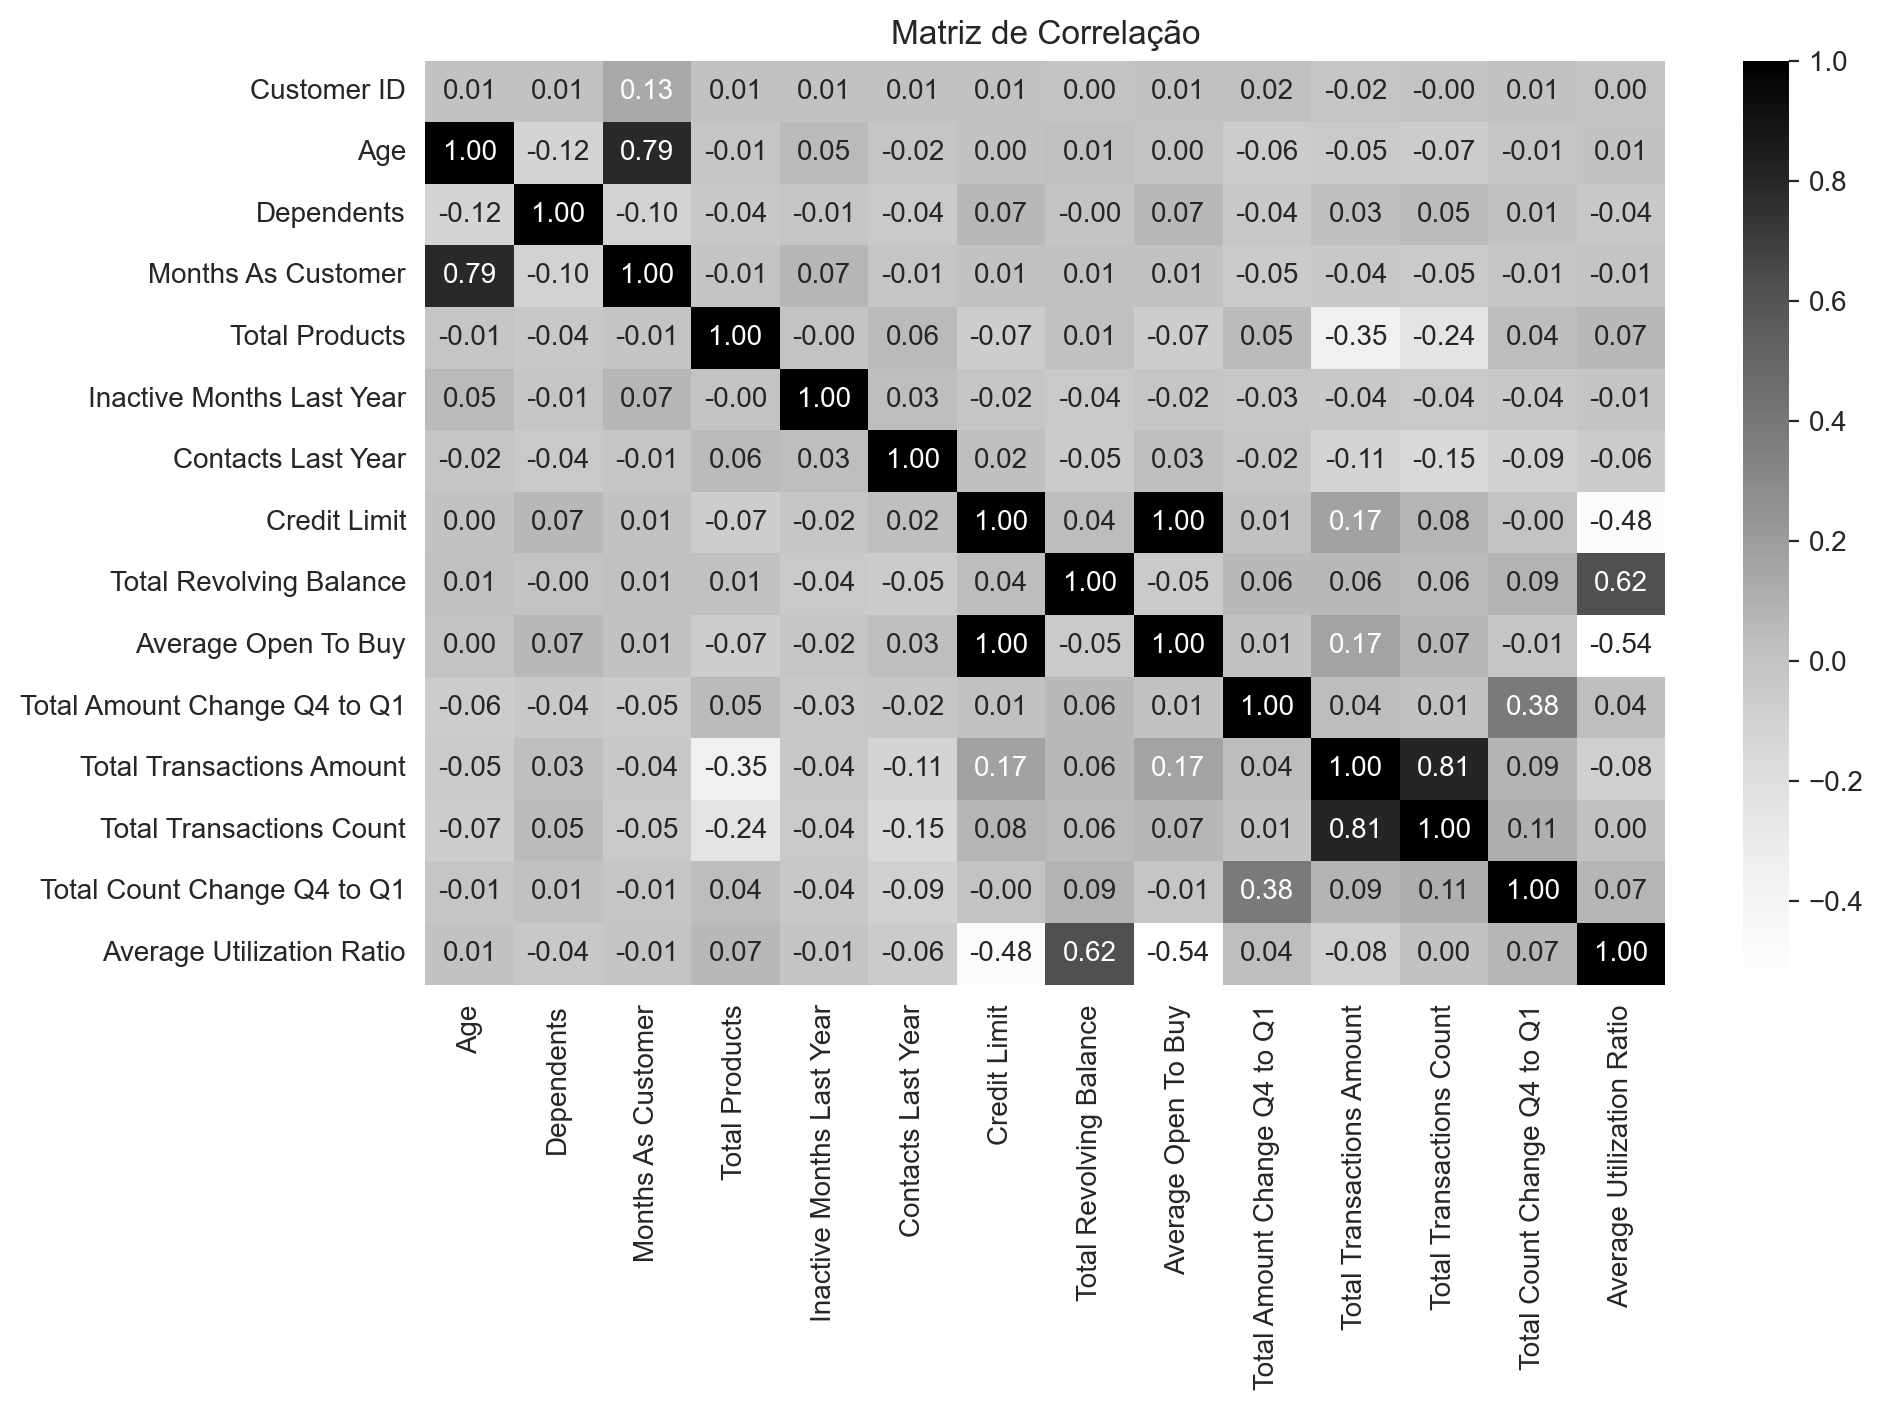

In [11]:
# Criando a matriz de correlação com as variáveis numéricas
corr_mat = df.select_dtypes(exclude="object").drop(df.columns[-2:], axis=1).corr()
corr_mat = corr_mat.drop("CLIENTNUM", axis=1)
corr_mat.columns = [tranformador_titulo(elem) for elem in corr_mat.columns]
corr_mat.index = [tranformador_titulo(elem) for elem in corr_mat.index]

# Plottando a matriz usando o heatmap do Seaborn
plt.figure(figsize=(10, 6), dpi = 200)
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap="Greys")
plt.title("Matriz de Correlação", fontsize = 12)
plt.xticks(rotation = 90)

plt.show()

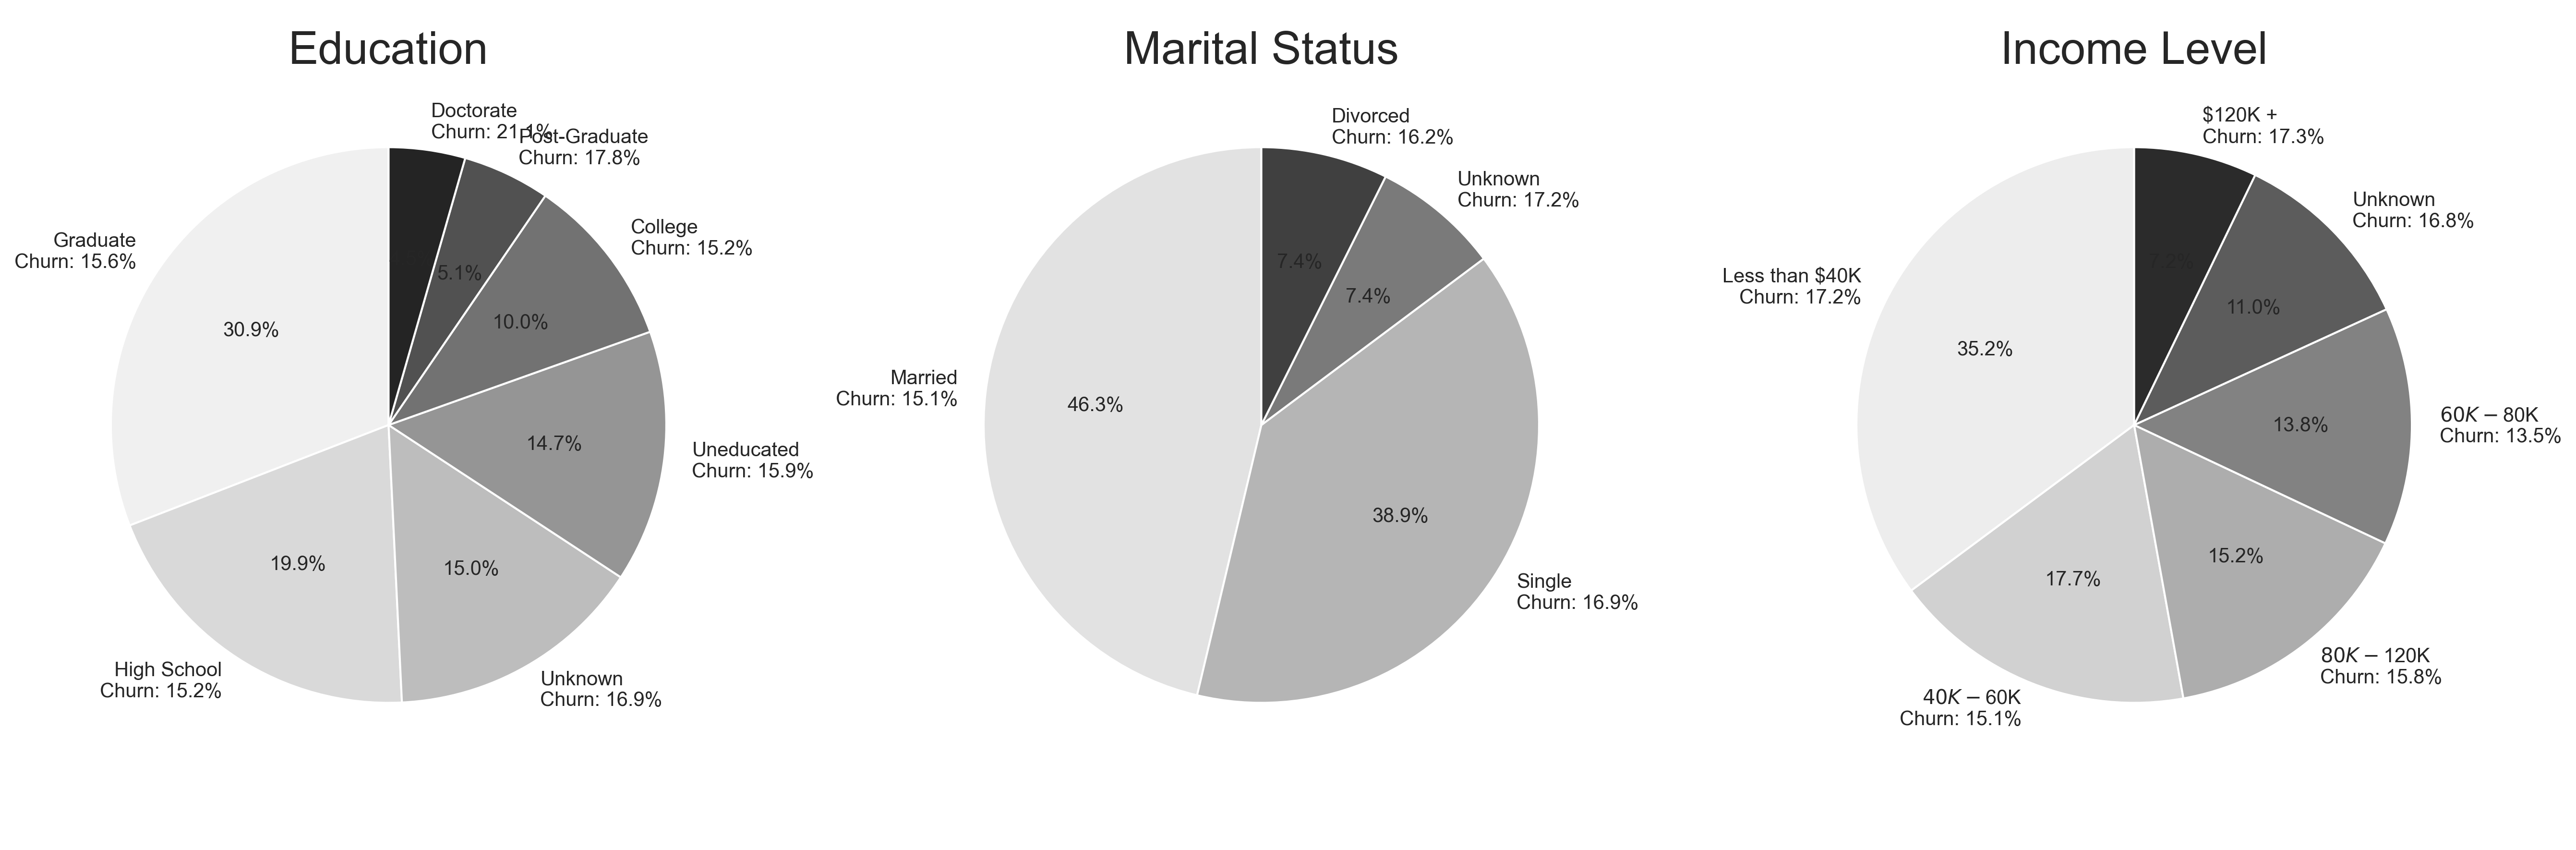

In [12]:
colunas_contagem = ["Education_Level", "Marital_Status", "Income_Category"]

fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=300)
axs = axs.flatten()

# Iterando pelas colunas para gerar os Pie-Plots
for idx, col in enumerate(colunas_contagem):
    counts = df[col].value_counts()
    churn_counts = df.groupby(col)['Attrition_Flag'].value_counts().unstack(fill_value=0)
    
    # Calculando a porcentagem de churn para cada categoria
    churn_percentages = (churn_counts['Attrited Customer'] / counts) * 100
    
    # Preparando os rótulos
    labels = [f'{label}\nChurn: {churn_percentages[label]:.1f}%' for label in counts.index]
    axs[idx].pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, 
                 colors=sns.color_palette("Greys", n_colors=len(counts)), 
                 textprops={'fontsize': 10})
    axs[idx].set_title(f'{tranformador_titulo(col)}', y = 0.925, fontsize = 22.5)
    axs[idx].axis('equal')
    
plt.tight_layout()
plt.show()

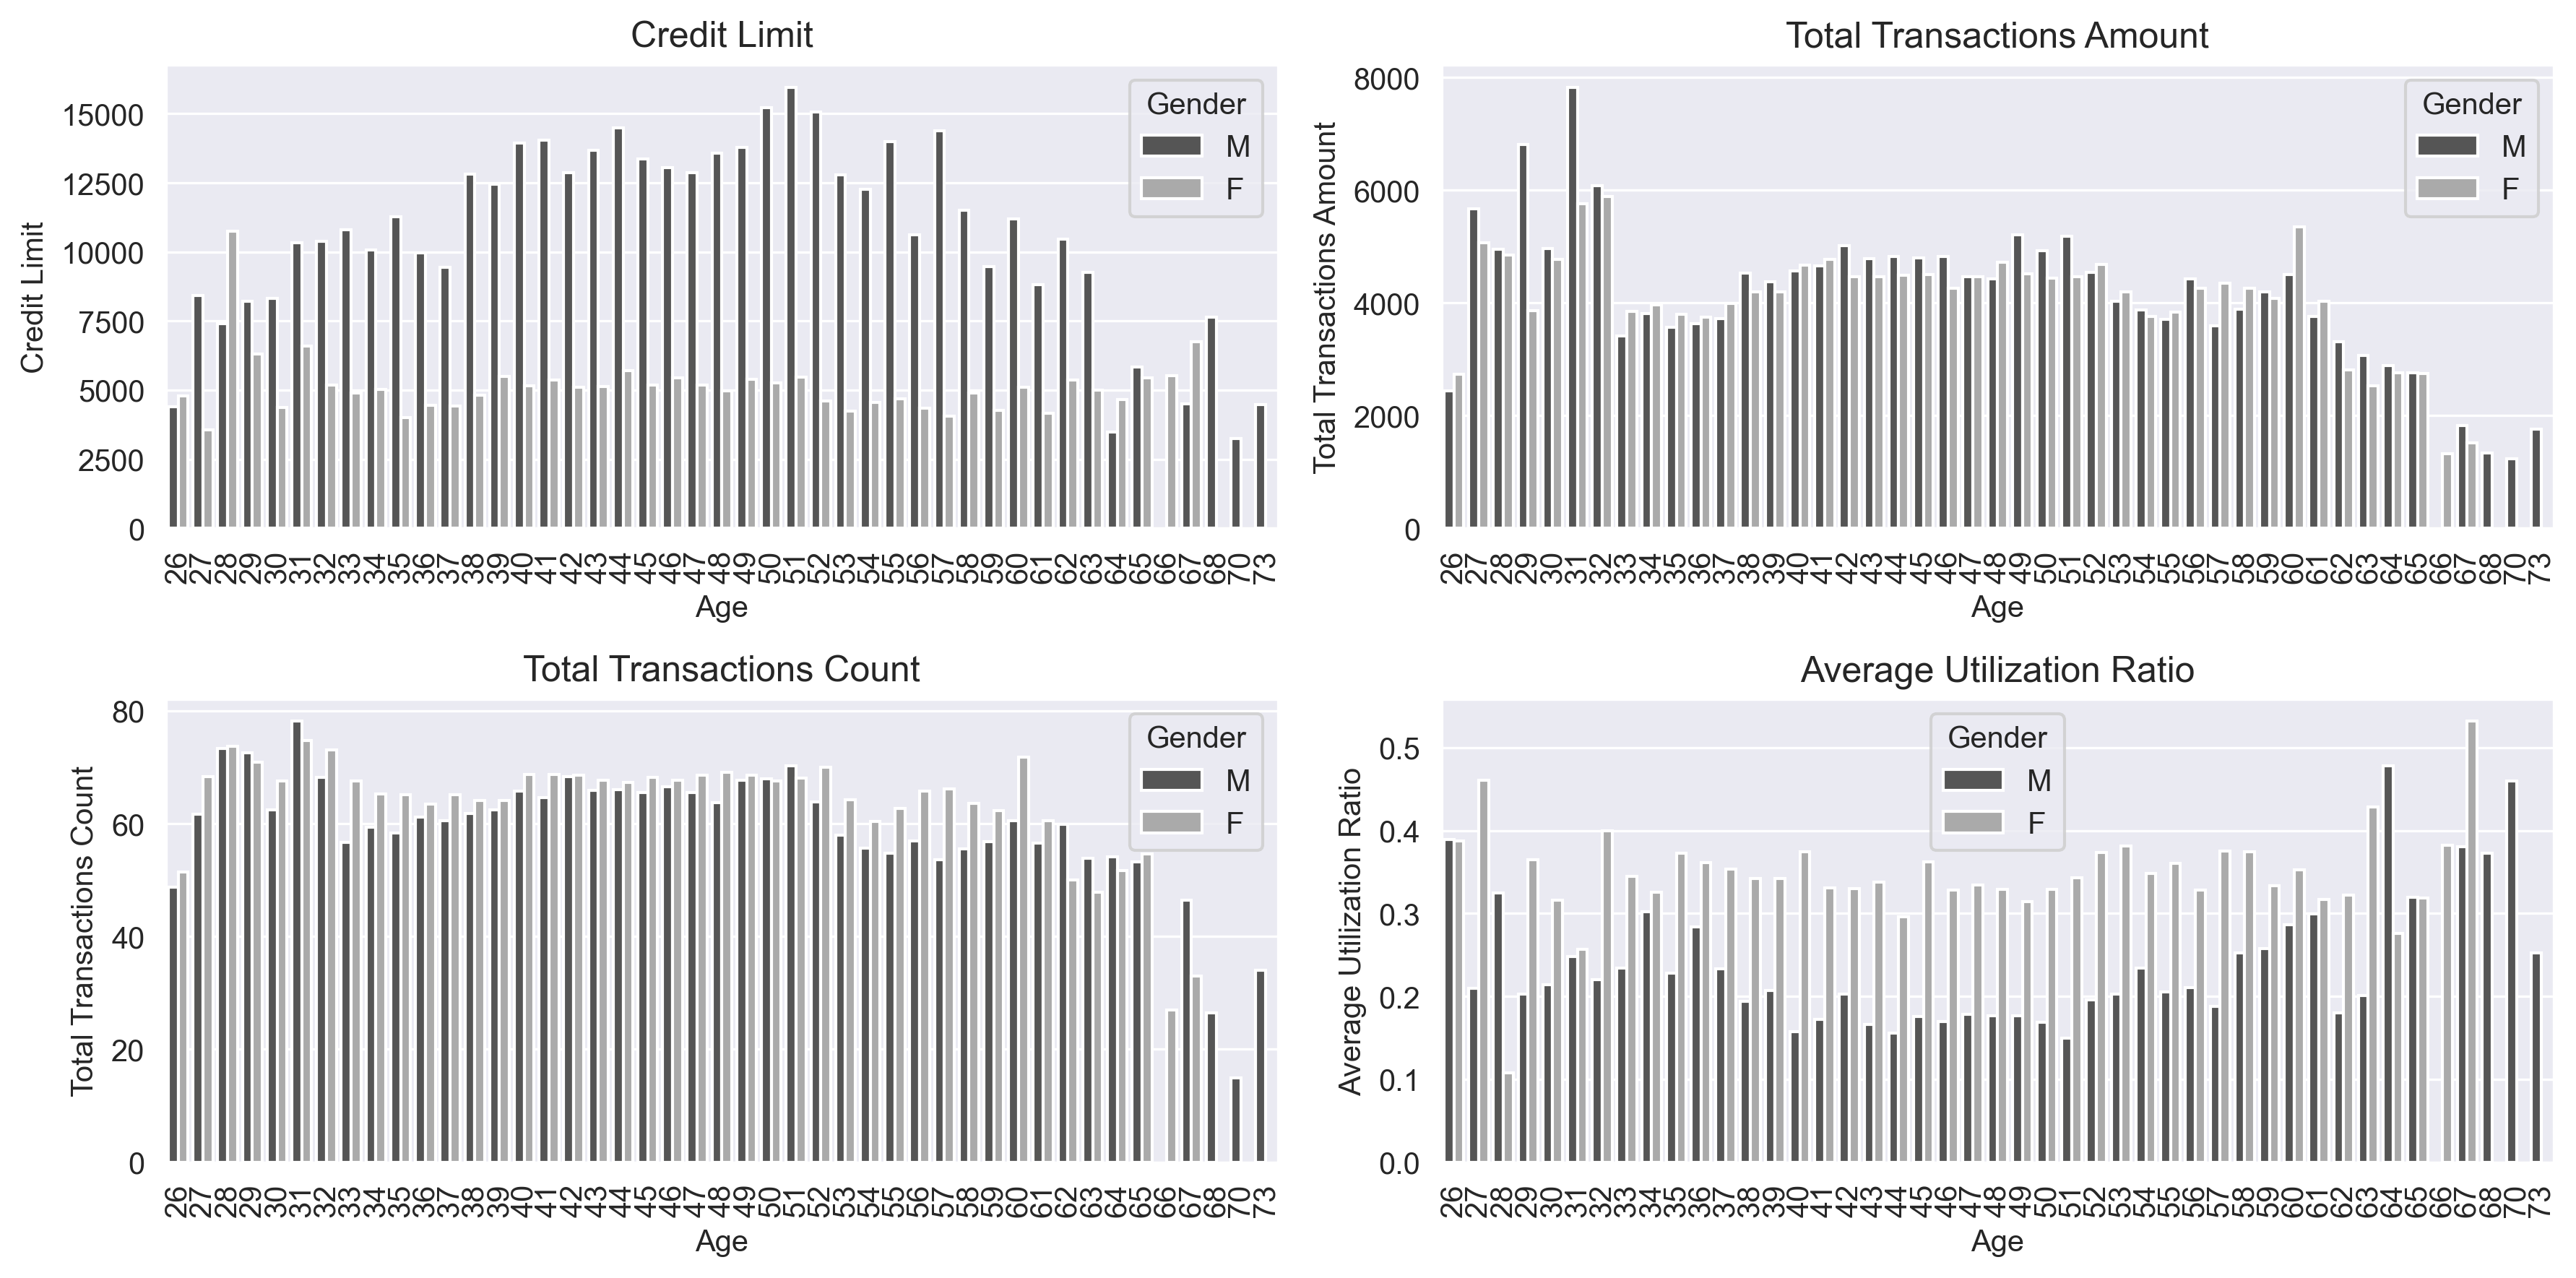

In [13]:
# Estabelecendo colunas de interesse
colunas_transferencia = ["Credit_Limit", 'Total_Trans_Amt','Total_Trans_Ct','Avg_Utilization_Ratio']

# Definir uma paleta personalizada para os gêneros
paletta_customizada = {"M": "#555555", "F": "#aaaaaa"} 

fig, axs = plt.subplots(2, 2, figsize=(12, 6), dpi=300)
axs = axs.flatten()

for idx, col in enumerate(colunas_transferencia):
    sns.barplot(df, x="Customer_Age", y=col, hue="Gender", palette=paletta_customizada, ax=axs[idx], ci=None)
    axs[idx].set_title(f'{tranformador_titulo(col)}', fontsize=12)
    axs[idx].set_xlabel(tranformador_titulo("Customer_Age"))
    axs[idx].set_ylabel(tranformador_titulo(col))
    axs[idx].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

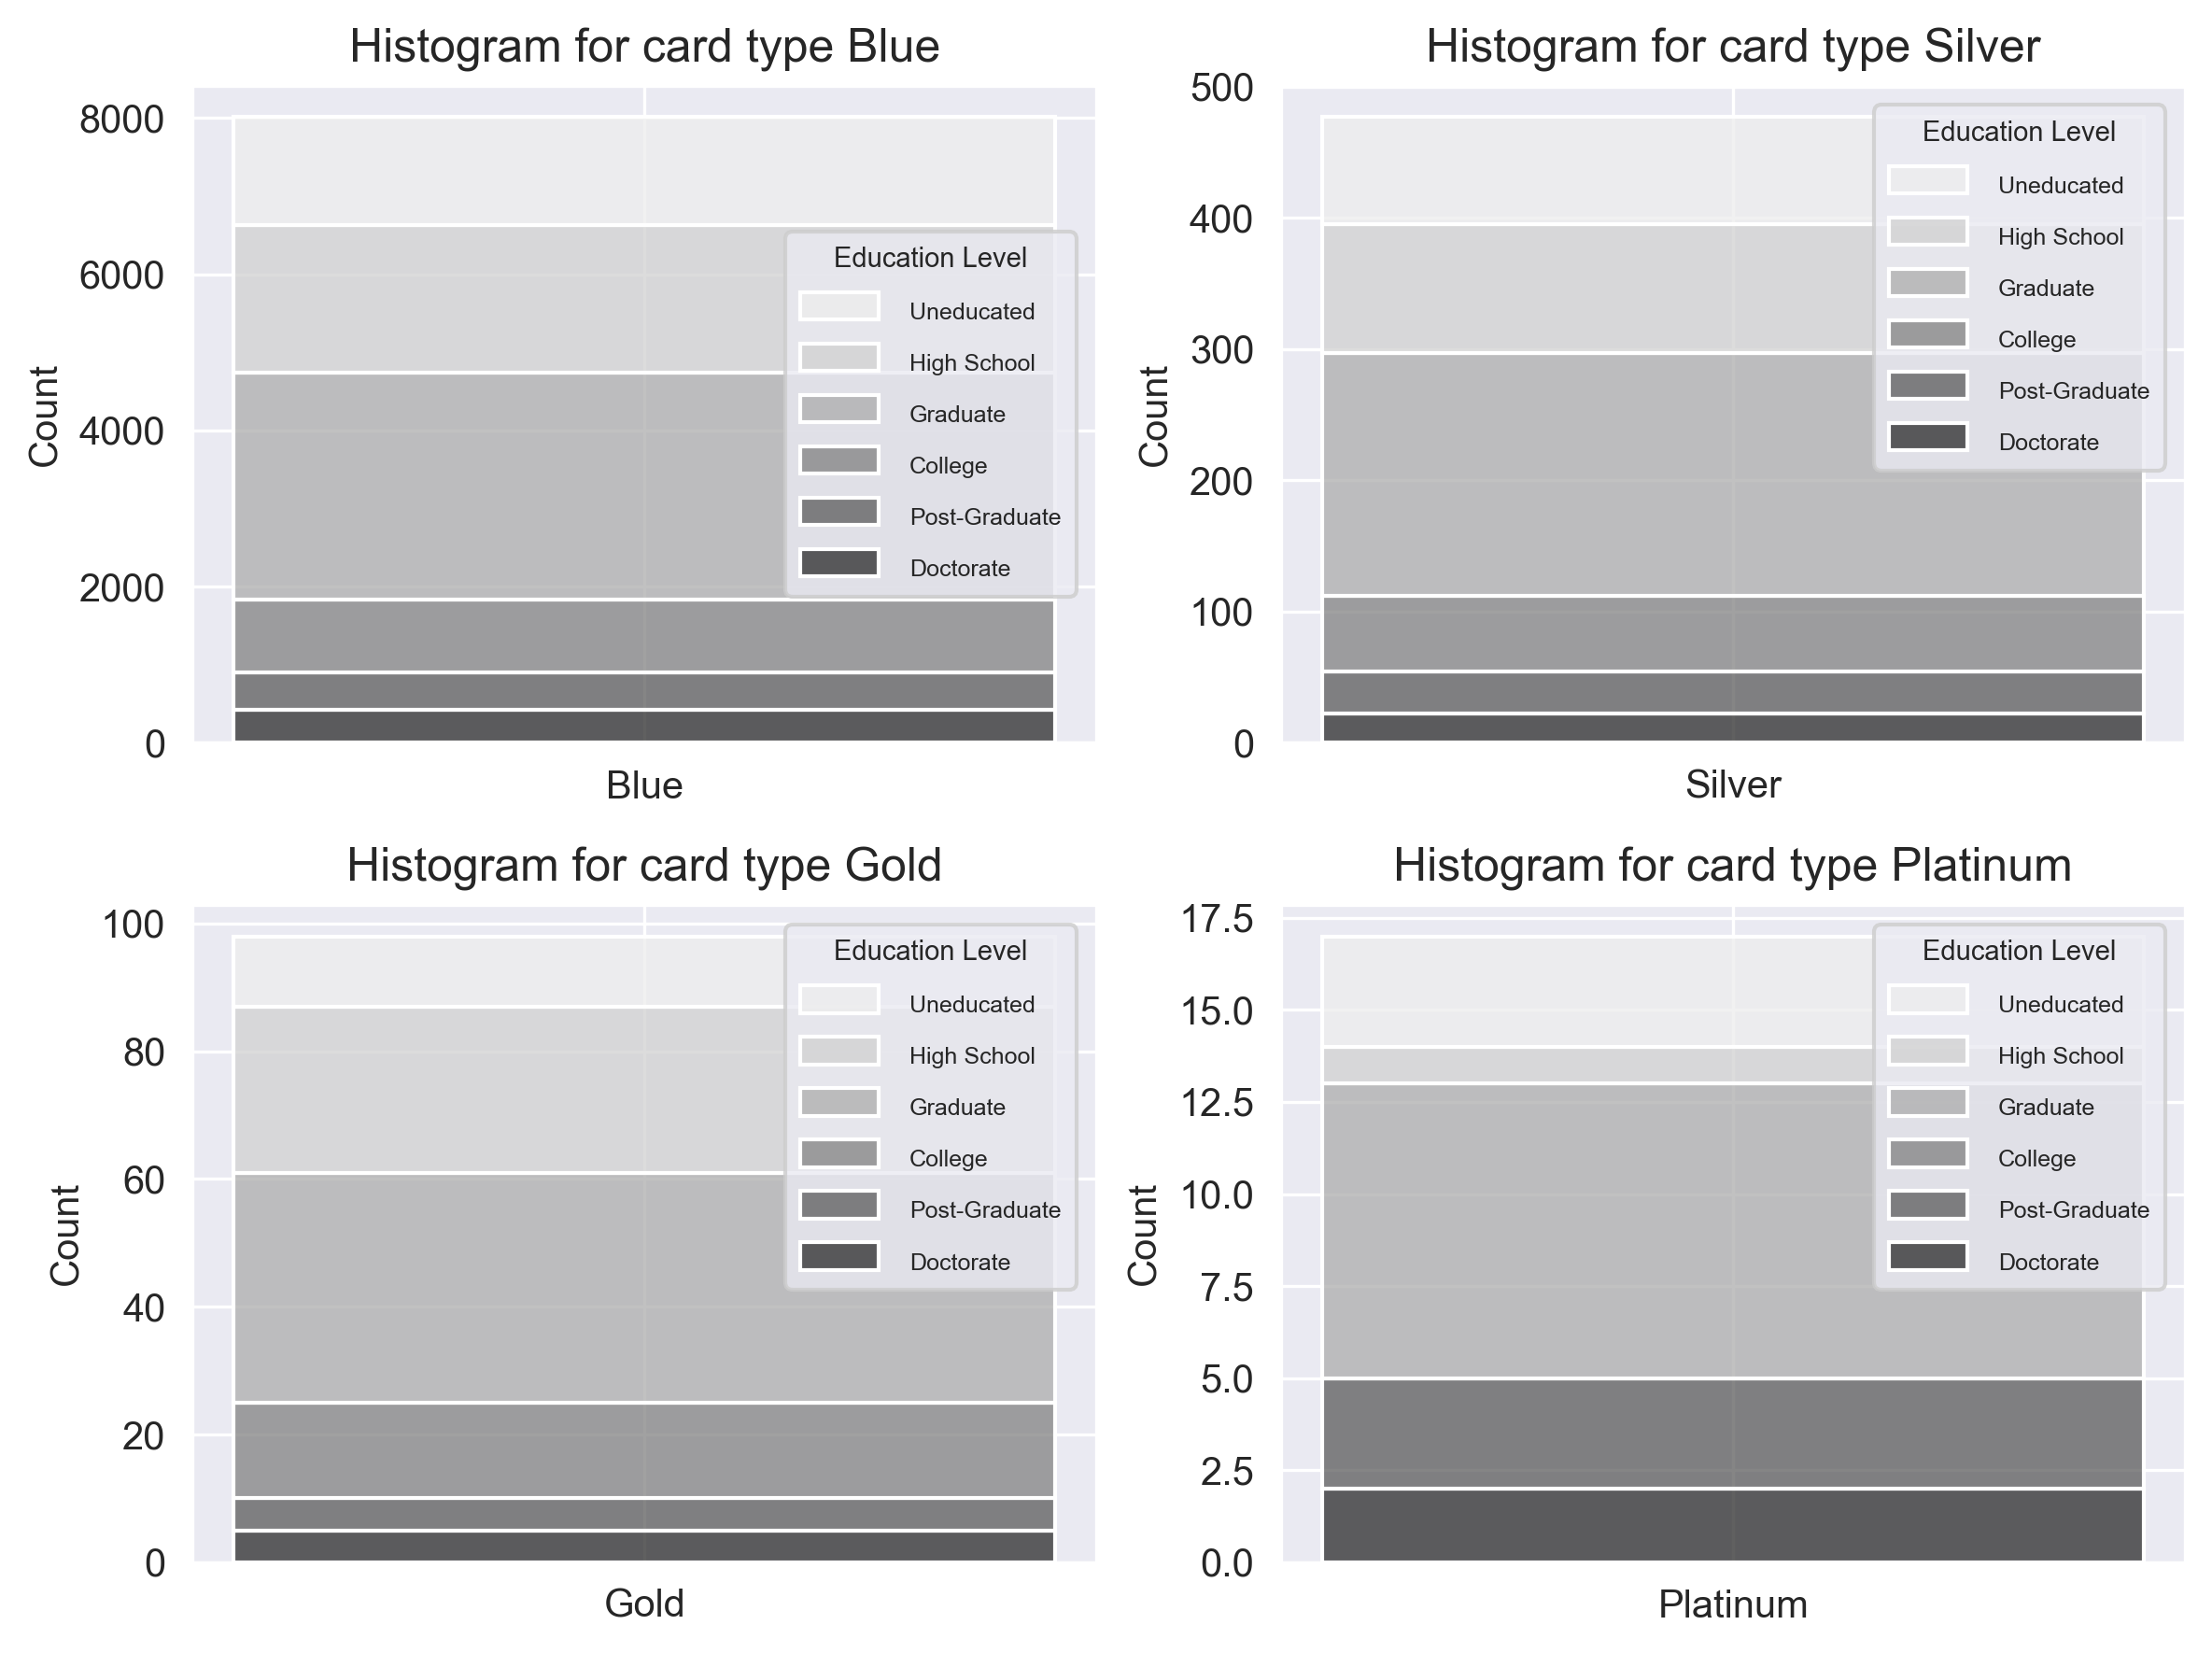

In [14]:
# Lista com os tipos de cartão à serem analisados
card_tipos = ["Blue", "Silver", "Gold", "Platinum"]

fig, axs = plt.subplots(2, 2, figsize=(8, 6), dpi=300)
axs = axs.flatten()

paletta_customizada = {
    "High School": "#999999", 
    "Graduate": "#666666",     
    "Uneducated": "#333333",   
    "College": "#000000",       
    "Post-Graduate": "#cccccc",  
    "Doctorate": "#444444"     
}

# Definindo a ordem nas legendas para o HUE
education_order = ["Uneducated","High School","Graduate","College","Post-Graduate","Doctorate"]

for idx, elem in enumerate(card_tipos):
    # Filtrando para excluir casos em que o Education_Level é "Unknown" e garantindo a análise de um único elemento por vez
    df_filter = df[(df["Card_Category"] == elem) & (df["Education_Level"] != "Unknown")]
    
    sns.histplot(df_filter, x='Card_Category', hue="Education_Level", 
                 palette="Greys", ax=axs[idx], multiple="stack", 
                 hue_order = education_order)  
    
    legend = axs[idx].get_legend() 
    if legend:  
        legend.set_title('Education Level')  
        plt.setp(legend.get_texts(), fontsize='6')  
        plt.setp(legend.get_title(), fontsize='7')  

    axs[idx].set_title(f'Histogram for card type {elem}', fontsize=12)
    axs[idx].set_xlabel('')

plt.tight_layout()
plt.show()  

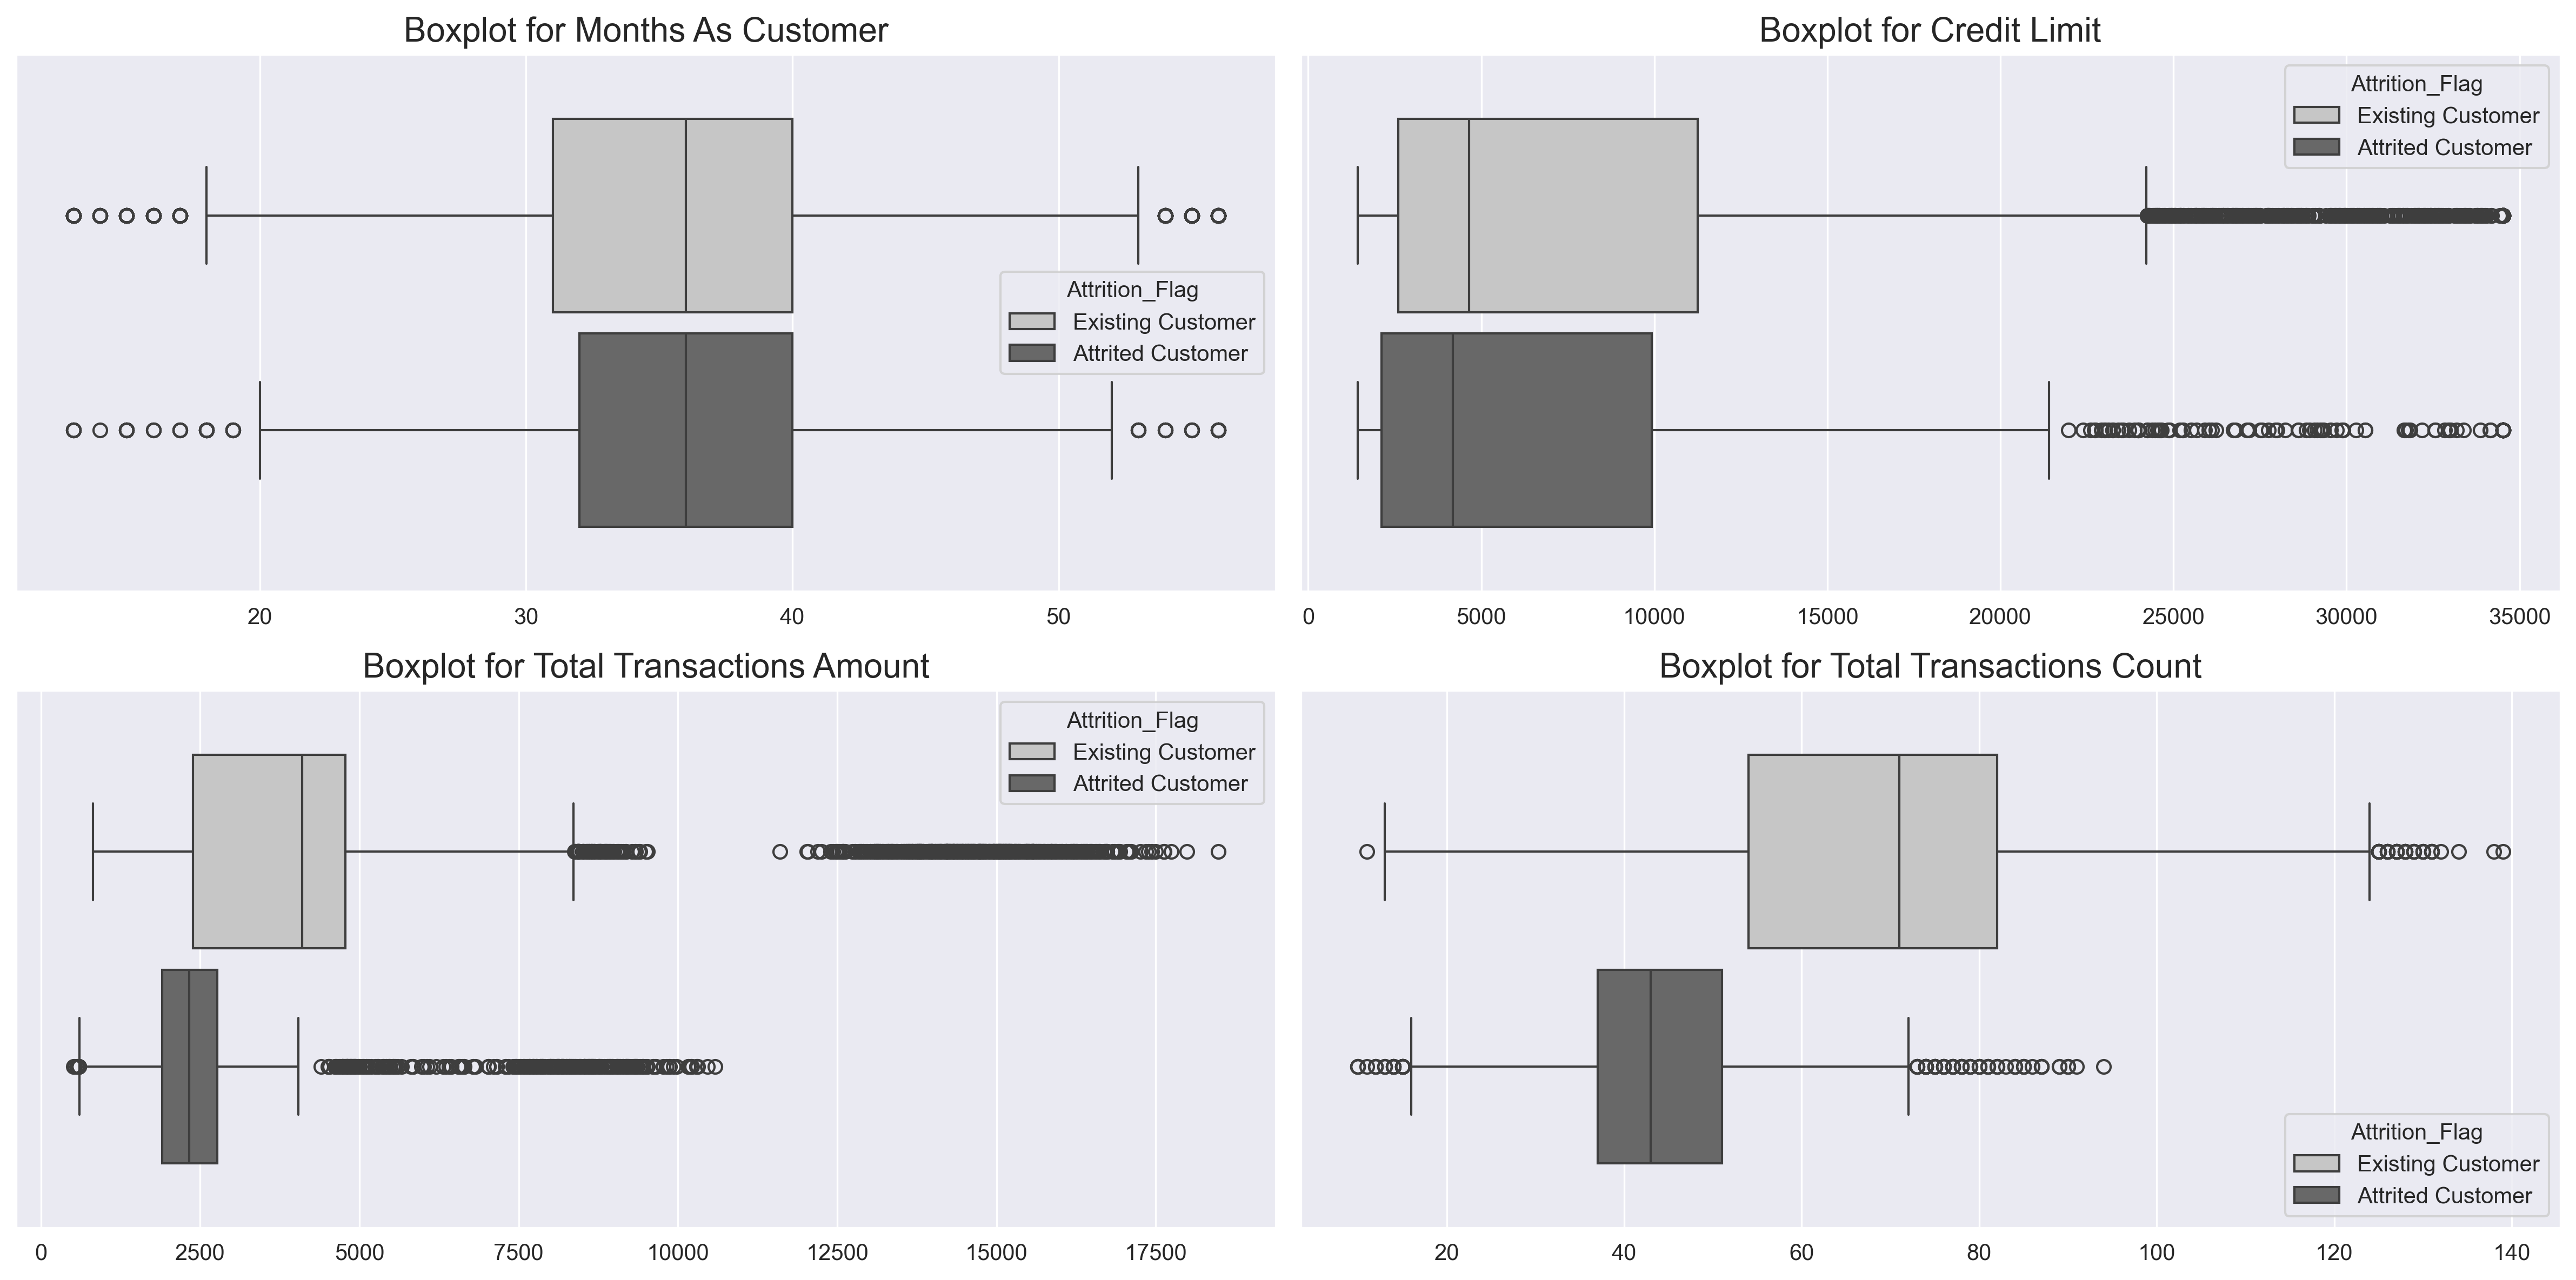

In [15]:
# Colunas de interesse para o boxplot
colunas_boxplot = ["Months_on_book", "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct"]

fig, axs = plt.subplots(2, 2, figsize = (16,8), dpi = 300)
axs = axs.flatten()

for idx, col in enumerate(colunas_boxplot):
    sns.boxplot(data = df, x = col, ax = axs[idx], palette = "Greys", hue = 'Attrition_Flag', gap = 0.1)
    axs[idx].set_title(f"Boxplot for {tranformador_titulo(col)}", fontsize = 15)
    axs[idx].set_xlabel("")
    
plt.tight_layout()
plt.show()


# Limpeza e Preparação dos Dados

Nesta seção, realizamos a limpeza e transformação dos dados, com o objetivo de preparar o dataset para treinamento de um modelo de machine learning. O processo inclui dropar colunas irrelevantes, tratar valores ausentes e outliers, e realizar codificações ordinais e binárias. Por fim, o dataset completamente limpo é exportado para uso posterior.


In [16]:
# Droppando colunas que não serão utilizadas no treinamento, duas de NaiveBayes e uma de Identificação
df = df.drop(df.columns[-2:], axis=1)
df = df.drop("CLIENTNUM", axis = 1)

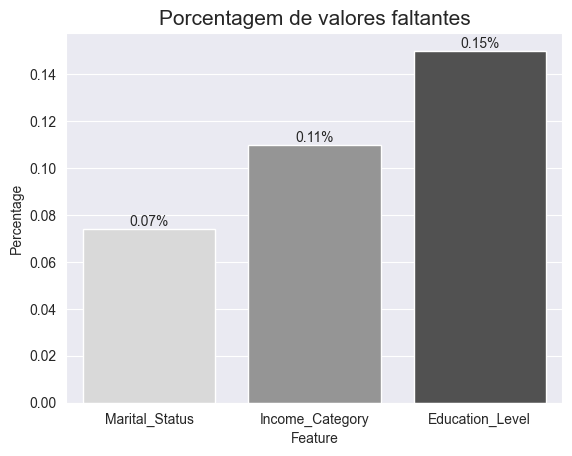

In [17]:
# Foi percebido que nesse dataset não existem np.NaN, mas existem "Unknowns" que são equivalentes
# Logo, vou converter eles para np.NaN, na intenção de futuramente tratá-los

colunas_categoricas = list(df.select_dtypes(exclude = np.number).columns)
for column in colunas_categoricas:
    df[column] = df[column].replace("Unknown", np.nan)
    
# Essa função retorna uma Series com os cálculos da porcentagem de valores faltando em relação ao total
def percent_missing(df):
    sorted_sum = df.isna().sum().sort_values(ascending = True)/len(df)
    sorted_sum = sorted_sum[sorted_sum > 0].sort_values()
    return sorted_sum

# Esta função gera um gráfico de barras para visualizar a porcentagem de valores faltantes utilizando a função anterior
def generate_missplot(df):
    missing_values = percent_missing(df)
    ax = sns.barplot(x=missing_values.index, y=missing_values, palette="Greys")
    for i in range(missing_values.count()):
        ax.bar_label(ax.containers[i], fmt="%.2f%%", fontsize=10)     
    plt.xlabel("Feature")
    plt.ylabel("Percentage")
    ax.set_title("Porcentagem de valores faltantes", fontsize=15)

generate_missplot(df)

In [18]:
# Como temos poucas linhas, não desejei dropar nenhuma linha com NaN, ao invés disso
# escolhi por preencher com o elemento da célula seguinte, mas para ter maior taxa de 
# acerto, antes ordenei pelo Credit_Limit, para que as células estejam teoricamente
# mais próximas umas das outras, dito que essa coluna já se mostrou bem impactante.

nan_colunas = ["Marital_Status", "Income_Category", "Education_Level"]

for col in nan_colunas:
    df.sort_values(by="Credit_Limit", inplace=True)
    df[col].fillna(method="ffill", inplace=True)
    
print(f'Number of missing values: {sum(df.isna().sum())}')

Number of missing values: 0


In [19]:
# Função que utiliza o procedimento de John Tukey para reconhecimento de outliers
def iqr_outlier_remover(df, col):
    q25, q75 = np.percentile(df[col], [25, 75])
    iqr = q75 - q25
    limite_inferior = q25 - 1.5 * iqr
    limite_superior = q75 + 1.5 * iqr
    df_filtrado = df[(df[col] > limite_inferior) & (df[col] < limite_superior)]
    return df_filtrado

# Iterando por colunas que podem possuir outliers, e os removendo
possiveis_outliers = ["Months_on_book", "Credit_Limit", "Total_Trans_Amt", "Total_Trans_Ct"]
for column in possiveis_outliers:
    df = iqr_outlier_remover(df, column)

In [20]:
from sklearn.preprocessing import OrdinalEncoder

# Essas variáveis não possuem valor ordinal, então serão transformadas em binárias
dummies_variable = ["Gender", "Marital_Status"]
df = pd.get_dummies(data = df, columns = dummies_variable, drop_first = True)

# Nessas colunas existe uma ordem implicita de importância, então usarei um Encoder
natural_rankings = ["Education_Level", "Income_Category", "Card_Category", "Attrition_Flag"]

education_order = ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
card_order = ['Blue', 'Silver', 'Gold', 'Platinum']
attrition_order = ['Attrited Customer', 'Existing Customer']

# Criando um encoder com às ordens especificadas
encoder = OrdinalEncoder(categories=[education_order, income_order, card_order, attrition_order])

# Aplicando o OrdinalEncoder nas colunas especificadas
df[natural_rankings] = encoder.fit_transform(df[natural_rankings])

In [21]:
# Exportação do dataset completamente limpo para o diretório
df.to_csv('Churn_Prediction', index = False)

# Machine Learning - Seleção Inicial entre Diferentes Algoritmos
No código abaixo, os principais e mais eficientes modelos de machine learning para classificação são testados utilizando Validação Cruzada com 10 folds para garantir a precisão de cada algoritmo. A métrica de avaliação utilizada é a precisão, e os resultados finais de cada modelo são organizados em um DataFrame para fácil visualização. Utilizarei os três melhores desempenhos para realizar a tunagem.



In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Definindo as variáveis e o resultado esperado
x = df.drop("Attrition_Flag", axis = 1)
y = df["Attrition_Flag"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, test_size = 0.2)

# Escalando os dados
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Dicionário com os modelos que serão testados
models = {
    "Logistic_Regression" : LogisticRegression(),
    "Support_Vector_Machines" : SVC(),
    "Decision_Tree_Classifier" : DecisionTreeClassifier(),
    "ExtraTreeClassifier" : ExtraTreeClassifier(),
    "Random_Forest_Classifier" : RandomForestClassifier(),
    "GradientBoostingClassifier" : GradientBoostingClassifier(),
    "XGBoost" : XGBClassifier()    
    }

resultados = []

# Perfomando 10-Fold Cross Validation para garantir os resultados certeiros da precisão de cada modelo
for name, model in models.items():
    result = cross_val_score(model, x_train, y_train, scoring = "accuracy", cv = 10, n_jobs = -1)
    resultados.append({"Model": name, "Mean Accuracy": result.mean()})

# Criar um DataFrame para visualizar os resultados iniciais
results_df = pd.DataFrame(resultados)
results_df

Model  Mean Accuracy
0         Logistic_Regression       0.906344
1     Support_Vector_Machines       0.933149
2    Decision_Tree_Classifier       0.932069
3         ExtraTreeClassifier       0.876623
4    Random_Forest_Classifier       0.960258
5  GradientBoostingClassifier       0.964107
6                     XGBoost       0.968268

# Modelo de Machine Learning - DecisionTreeClassifier
Nesta seção, focaremos em otimizar a estrutura do DecisionTreeClassifier. Abordaremos como ajustar parâmetros como a profundidade máxima da árvore, o número mínimo de amostras para dividir um nó e o critério de divisão. Essas configurações influenciam diretamente a capacidade do modelo de capturar padrões nos dados, evitando o overfitting e garantindo um desempenho robusto.


In [23]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

# Definindo os parâmetros que desejamos configurar
param_grid = {
    "criterion": ['gini', 'entropy', 'log_loss'],
    "splitter": ['best', 'random'], 
    "max_depth": [None, 10, 20, 30, 50],  
    "min_samples_split": [2, 5, 10, 15], 
    "min_samples_leaf": [1, 3, 5, 7, 10], 
    "max_features": ['sqrt', 'log2', 0.5, None],  
    "class_weight": [None, 'balanced'], 
}

# Performando uma busca com cross-validation pelos melhores parâmetros
grid_search = GridSearchCV(dtc, param_grid = param_grid, cv = 10, n_jobs = -1)
grid_search.fit(x_train, y_train)

print(f"Estimators: {grid_search.best_params_}")

# Avaliar o desempenho com Cross-Validation
optimized_dtc = grid_search.best_estimator_
result = cross_val_score(optimized_dtc, x_train, y_train, scoring="accuracy", cv=10, n_jobs=-1)
print(f'Resultado após o tuning de hyperparameters: {pd.Series(result).mean() * 100:.3f}%')

Estimators: {'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Resultado após o tuning de hyperparameters: 94.131%


# Modelo de Machine Learning - RandomForestClassifier
Aqui, exploraremos o aperfeiçoamento do RandomForestClassifier. Analisaremos a importância do número de árvores na floresta, a seleção de características em cada divisão e as estratégias para lidar com a diversidade de árvores. Discutiremos também a aplicação de técnicas como validação cruzada e busca em grade para maximizar a precisão do modelo, garantindo uma generalização eficaz em novos dados.


In [24]:
rfc = RandomForestClassifier()

# Definindo os parâmetros que desejamos configurar
param_grid = {
    'criterion': ["gini", "entropy"],  
    'n_estimators': [100, 400],
    'max_features': ["sqrt", "log2", None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Performando uma busca com cross-validation pelos melhores parâmetros
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Estimators: {grid_search.best_params_}")

# Avaliar o desempenho com Cross-Validation
optimized_rfc = grid_search.best_estimator_
result = cross_val_score(optimized_rfc, x_train, y_train, scoring="accuracy", cv=10, n_jobs=-1)
print(f'Resultado após o tuning de hyperparameters: {pd.Series(result).mean() * 100:.3f}%')

Estimators: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 400}
Resultado após o tuning de hyperparameters: 95.995%


# Modelo de Machine Learning - XGBClassifier
Nesta seção, iremos nos aprofundar no refinamento do XGBClassifier, explorando suas características únicas, como a regularização e o controle da complexidade do modelo. Abordaremos a importância de ajustar parâmetros como a taxa de aprendizado, a profundidade máxima da árvore e o número de árvores, além de técnicas avançadas como o ajuste de subsample e colsample_bytree. A utilização de validação cruzada e busca em grade será destacada para encontrar a combinação ideal de hiperparâmetros, maximizando assim o desempenho do modelo em tarefas de classificação complexas.

In [25]:
xgb = XGBClassifier()

# Definindo os parâmetros que desejamos configurar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [2, 3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Realizando a busca por grid com validação cruzada
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=10, n_jobs=-1)
grid_search.fit(x_train, y_train)

print(f"Estimators: {grid_search.best_params_}")

# Avaliar o desempenho com Cross-Validation
optimized_xgb = grid_search.best_estimator_
result = cross_val_score(optimized_xgb, x_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(f'Resultado após o tuning de hyperparameters: {pd.Series(result).mean() * 100:.3f}%')

Estimators: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Resultado após o tuning de hyperparameters: 97.243%


# Análise das Previsões de Atrição em Dados Inéditos

Nesta seção, realizamos previsões com dados que não foram utilizados durante o treinamento dos modelos. Utilizamos três modelos otimizados: Decision Tree Classifier (DTC), Random Forest Classifier (RFC) e XGBoost (XGB). Em seguida, comparamos as previsões feitas por cada modelo com os valores reais do conjunto de teste.


In [38]:
# Criando previsões em data não antes vista, usando os modelos treinados
y_pred_dtc = optimized_dtc.predict(x_test)
y_pred_rfc = optimized_rfc.predict(x_test)
y_pred_xgb = optimized_xgb.predict(x_test)

# Dicionário comparativo entre as previsões e a realidade
comparativo = {
    "Realidade": y_test,
    "Predict_DTC": y_pred_dtc,
    "Predict_RFC": y_pred_rfc,
    "Predict_XGB": y_pred_xgb
}

# Dataframe comparando as respostas dos modelos
comparativo_df = pd.DataFrame(comparativo)
comparativo_df

Realidade  Predict_DTC  Predict_RFC  Predict_XGB
8893        1.0          1.0          1.0            1
4760        1.0          1.0          1.0            1
1001        1.0          1.0          1.0            1
4811        0.0          0.0          0.0            0
5706        1.0          1.0          1.0            1
...         ...          ...          ...          ...
2511        0.0          0.0          0.0            0
8518        1.0          1.0          1.0            1
7379        1.0          1.0          1.0            1
6357        1.0          0.0          1.0            1
855         1.0          1.0          1.0            1

[1623 rows x 4 columns]

# Análise das Matrizes de Confusão para cada Modelo
Este código realiza a visualização das matrizes de confusão para três modelos de classificação: XGBoost, Decision Tree e Random Forest. Utilizando um conjunto de dados previamente definido, o código calcula as matrizes de confusão com base nas previsões de cada modelo em comparação com os rótulos verdadeiros. As matrizes de confusão são apresentadas em um layout de subplots, permitindo uma comparação visual direta entre o desempenho dos modelos. O uso do mapa de cores "Greys" oferece uma representação clara dos resultados, onde os tons mais escuros indicam maior frequência de classificações.

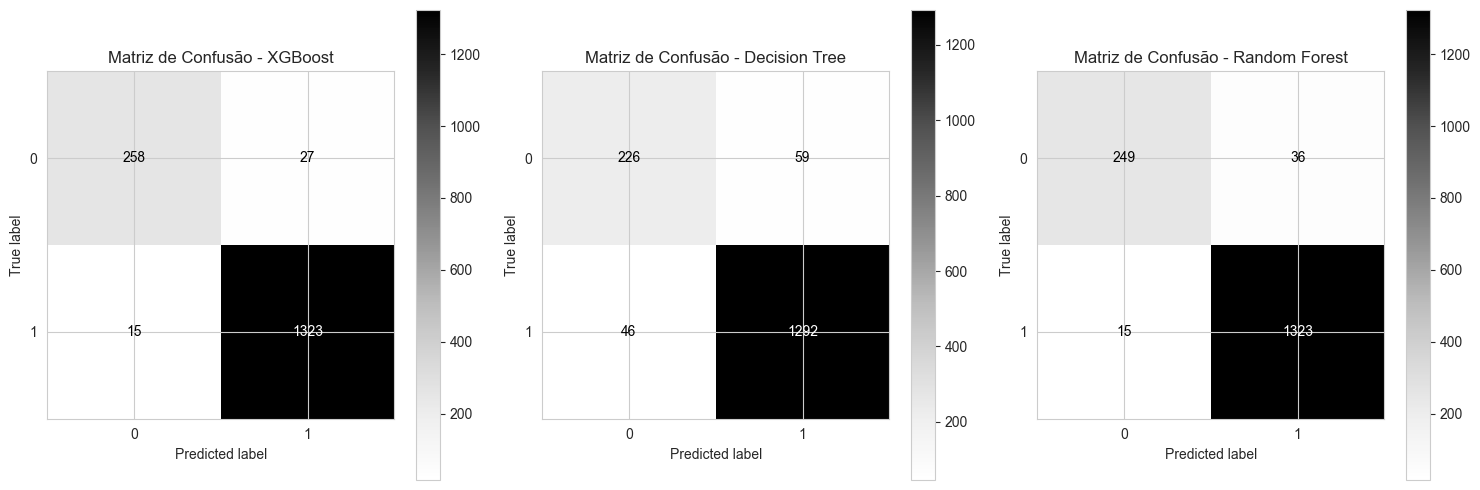

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = {
    'XGBoost': y_pred_xgb,
    'Decision Tree': y_pred_dtc,
    'Random Forest': y_pred_rfc
}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, (nome_modelo, preds) in zip(axs, predictions.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Greys)
    ax.set_title(f'Matriz de Confusão - {nome_modelo}')

plt.tight_layout()
plt.show()

# Importâncias das Features nos Modelos 
Nesta seção, exploraremos como diferentes modelos de classificação avaliam e interpretam a importância das features. Discutiremos métodos específicos, como a importância baseada em árvore para o DecisionTreeClassifier, RandomForestClassifier e o XGBClassifier, permitindo uma melhor interpretação e validação dos resultados obtidos.


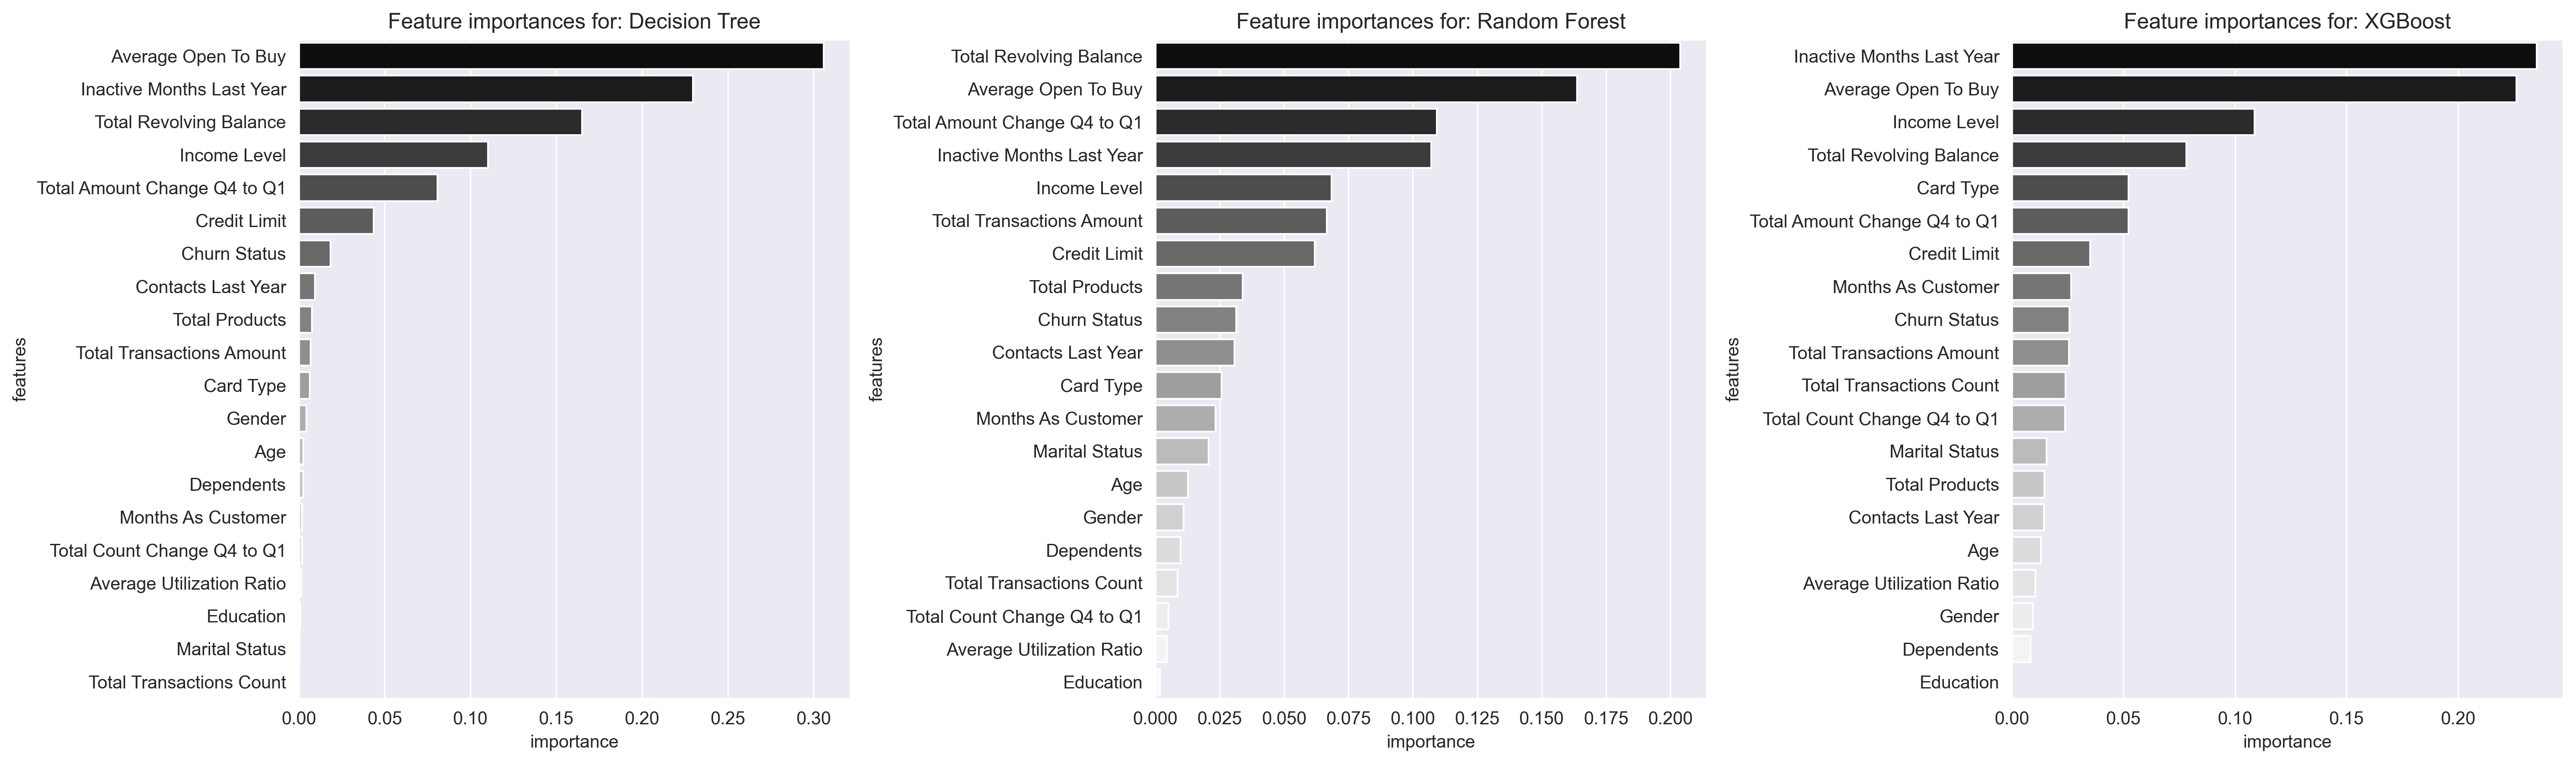

In [27]:
# Obtendo as importâncias das features
dtc_importances = optimized_dtc.feature_importances_
rfc_importances = optimized_rfc.feature_importances_
xgb_importances = optimized_xgb.feature_importances_

importances_list = [dtc_importances, rfc_importances, xgb_importances]
model_names = ['Decision Tree', 'Random Forest', 'XGBoost']

fig, axs = plt.subplots(1, 3, figsize=(20, 6), dpi=300)
axs = axs.flatten()

# Plotando as importâncias para cada modelo
for idx, (importance, model_name) in enumerate(zip(importances_list, model_names)):
    columns_for_viz = [tranformador_titulo(col) for col in list(x.columns)]
    
    importances_df = pd.DataFrame({"features": columns_for_viz, "importance": importance})
    importances_df = importances_df.sort_values(by="importance", ascending=False)

    palette = sns.color_palette("Greys_r", n_colors=len(importances_df))
    sns.barplot(data=importances_df, x="importance", y="features", palette=palette, ax=axs[idx])
    
    axs[idx].set_title(f"Feature importances for: {model_name}")

plt.tight_layout()
plt.show()

# Visualização das Árvores de Decisão
Nesta seção, apresentamos visualizações das árvores de decisão para três modelos distintos: DecisionTreeClassifier, RandomForestClassifier e XGBClassifier. Utilizando subplots, exibimos a estrutura simplificada das árvores, permitindo uma análise comparativa. Essas representações gráficas facilitam a compreensão da lógica de decisão de cada modelo e ajudam a identificar como as características influenciam as previsões. Os gráficos completos, que refletem a complexidade das árvores, estão disponíveis no GitHub para uma análise mais detalhada.

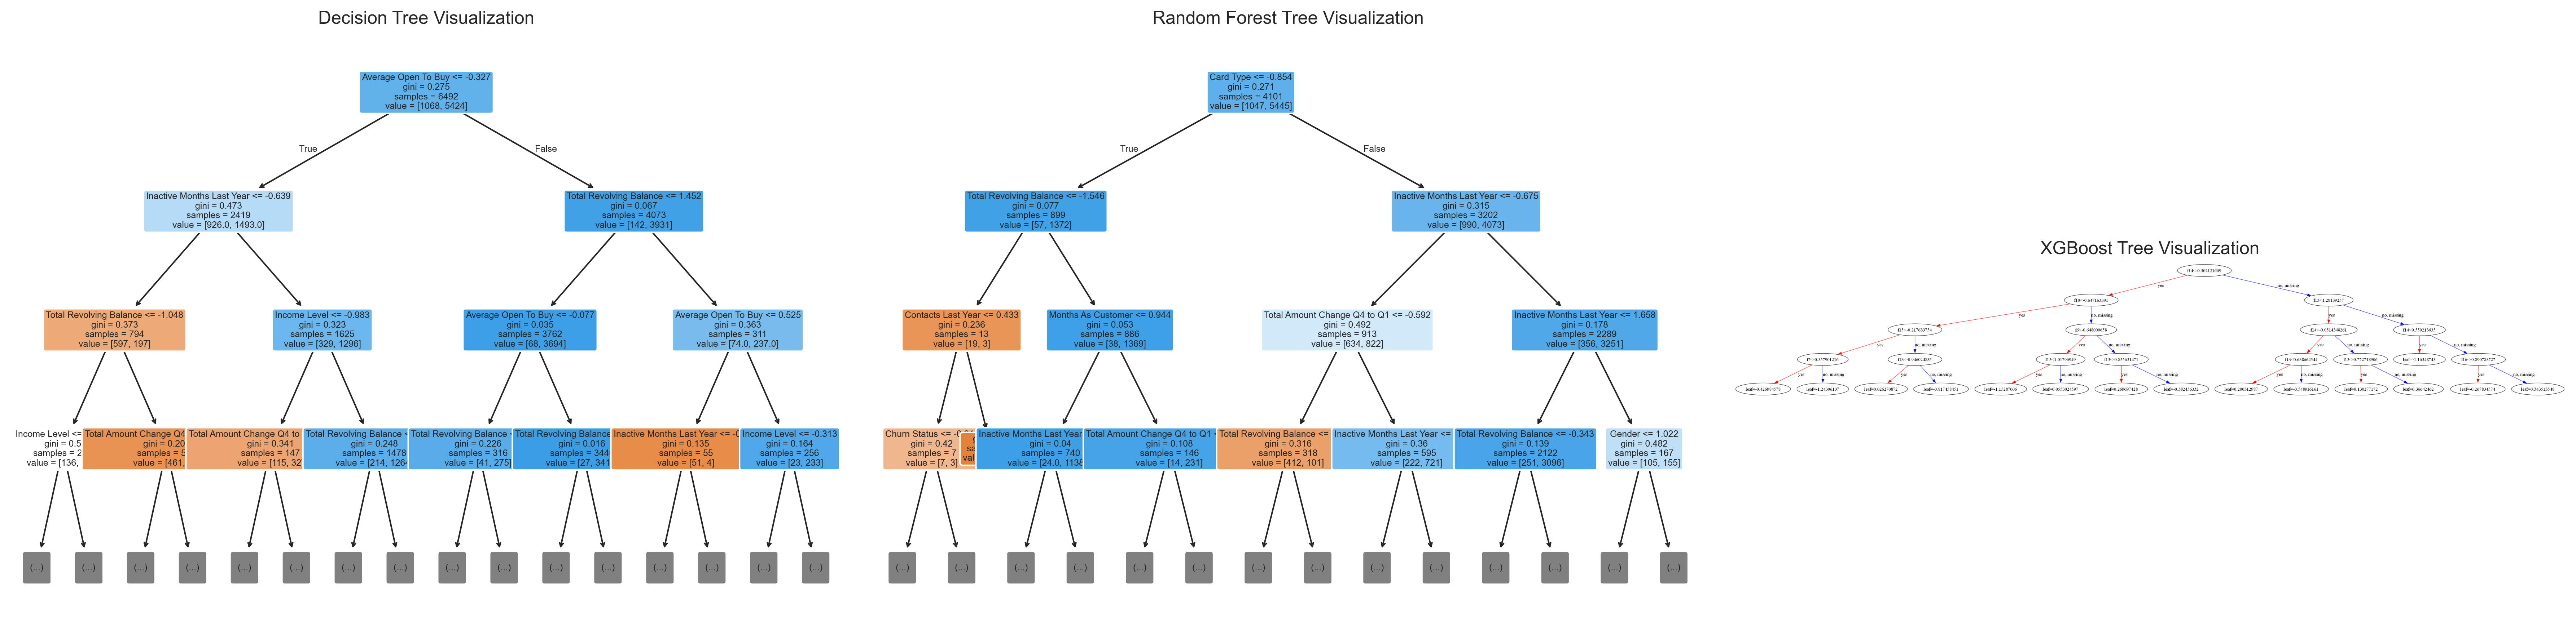

In [28]:
from sklearn.tree import plot_tree
from xgboost import plot_tree as xgb_plot_tree

# Criar subplots para os modelos
fig, axs = plt.subplots(1, 3, figsize=(24, 6), dpi=300)
columns_for_viz = [tranformador_titulo(col) for col in list(x.columns)]

plt.subplot(1, 3, 1)
plot_tree(optimized_dtc, filled=True, max_depth=3, feature_names=columns_for_viz, rounded=True, fontsize=6)
plt.title("Decision Tree Visualization")

plt.subplot(1, 3, 2)
plot_tree(optimized_rfc.estimators_[0], filled=True, max_depth=3, feature_names=columns_for_viz, rounded=True, fontsize=6)
plt.title("Random Forest Tree Visualization")

plt.subplot(1, 3, 3)
xgb_plot_tree(optimized_xgb, num_trees=0, ax = axs[2])
plt.title("XGBoost Tree Visualization")
plt.axis('off')

# A visualização é complexa devido ao número de nós. Os gráficos completos dos três métodos estão no GitHub.
plt.tight_layout()
plt.show()

# Exportação dos Modelos utilizando Joblib
 realizamos a exportação dos modelos de machine learning previamente otimizados e treinados, utilizando a biblioteca Joblib. Esse processo permite que os modelos sejam salvos em arquivos para posterior reutilização, sem a necessidade de retreinamento.

In [29]:
from joblib import dump

# Realizando a exportação dos modelos já treinados
dump(optimized_dtc, 'optimized_dtc.joblib')
dump(optimized_rfc, 'optimized_rfc.joblib')
dump(optimized_xgb, 'optimized_xgb.joblib')

['optimized_xgb.joblib']